In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

### Subtask:
Muat data dari file CSV ke dalam DataFrame pandas.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Artikel FTMM - Sheet1.csv')
display(df.head())

,title,description
0,Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...,FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...
1,Forum Group Discussion SEGTA 2025 Bahas Commun...,FTMM NEWS – Sesudah kegiatan orientasi pada Se...
2,Solar Harvest: Pengering Panen Cerdas Berbasis...,FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...
3,BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...,FTMM NEWS – BEM FTMM Universitas Airlangga me...
4,Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...,FTMM NEWS –Tim RASENA Universitas Airlangga ke...


## Text cleaning

### Subtask:
Lakukan pembersihan teks menggunakan Regular Expression untuk menghapus HTML tag, angka, simbol, atau tautan.


In [ ]:
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs or links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove symbols or special characters (keeping spaces)
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove leading/trailing whitespace
    text = text.strip()
    return text

# Potong 11 karakter awal dulu
df['description_trimmed'] = df['description'].str[11:]

# Baru lakukan cleaning
df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_description'] = df['description_trimmed'].apply(clean_text)

display(df.head())


,title,description,description_trimmed,cleaned_title,cleaned_description
0,Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...,FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...,Badan Eksekutif Mahasiswa Fakultas Teknologi ...,desa binaan wujud nyata pengabdian mahasiswa ...,badan eksekutif mahasiswa fakultas teknologi m...
1,Forum Group Discussion SEGTA 2025 Bahas Commun...,FTMM NEWS – Sesudah kegiatan orientasi pada Se...,Sesudah kegiatan orientasi pada Senin (14/07)...,forum group discussion segta bahas community ...,sesudah kegiatan orientasi pada senin lalu pe...
2,Solar Harvest: Pengering Panen Cerdas Berbasis...,FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...,Tim Inovasi Ikatan Mahasiswa Elektro (IME) Un...,solar harvest pengering panen cerdas berbasis ...,tim inovasi ikatan mahasiswa elektro ime unive...
3,BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...,FTMM NEWS – BEM FTMM Universitas Airlangga me...,BEM FTMM Universitas Airlangga melalui Kemen...,bem ftmm x argon kembangkan pupuk limbah sisik...,bem ftmm universitas airlangga melalui kemente...
4,Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...,FTMM NEWS –Tim RASENA Universitas Airlangga ke...,Tim RASENA Universitas Airlangga kembali melak...,pemasangan smartaqua oleh rasena unair dorong ...,tim rasena universitas airlangga kembali melak...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      30 non-null     object
 1   description                30 non-null     object
 2   description_trimmed        30 non-null     object
 3   cleaned_title              30 non-null     object
 4   cleaned_description        30 non-null     object
 5   processed_description      30 non-null     object
 6   processed_description_str  30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


## Text preprocessing

### Subtask:
Lakukan tokenisasi kata, stopword removal, dan stemming/lemmatization.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data, including punkt_tab
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

# Using a standard list of Indonesian stopwords
stop_words = set(stopwords.words('indonesian'))

def tokenize_text(text):
    # Handle potential None values
    if text is None:
        return []
    return word_tokenize(text)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Using Porter Stemmer for stemming
stemmer = PorterStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['processed_description'] = df['cleaned_description'].apply(tokenize_text).apply(remove_stopwords).apply(stem_tokens)

display(df.head())

,title,description,description_trimmed,cleaned_title,cleaned_description,processed_description
0,Desa Binaan 2.0 Wujud Nyata Pengabdian Mahasis...,FTMM NEWS – Badan Eksekutif Mahasiswa Fakultas...,Badan Eksekutif Mahasiswa Fakultas Teknologi ...,desa binaan wujud nyata pengabdian mahasiswa ...,badan eksekutif mahasiswa fakultas teknologi m...,"[badan, eksekutif, mahasiswa, fakulta, teknolo..."
1,Forum Group Discussion SEGTA 2025 Bahas Commun...,FTMM NEWS – Sesudah kegiatan orientasi pada Se...,Sesudah kegiatan orientasi pada Senin (14/07)...,forum group discussion segta bahas community ...,sesudah kegiatan orientasi pada senin lalu pe...,"[kegiatan, orientasi, senin, peserta, sustain,..."
2,Solar Harvest: Pengering Panen Cerdas Berbasis...,FTMM NEWS – Tim Inovasi Ikatan Mahasiswa Elekt...,Tim Inovasi Ikatan Mahasiswa Elektro (IME) Un...,solar harvest pengering panen cerdas berbasis ...,tim inovasi ikatan mahasiswa elektro ime unive...,"[tim, inovasi, ikatan, mahasiswa, elektro, ime..."
3,BEM FTMM x ARGON Kembangkan Pupuk Limbah Sisik...,FTMM NEWS – BEM FTMM Universitas Airlangga me...,BEM FTMM Universitas Airlangga melalui Kemen...,bem ftmm x argon kembangkan pupuk limbah sisik...,bem ftmm universitas airlangga melalui kemente...,"[bem, ftmm, universita, airlangga, kementerian..."
4,Pemasangan SmartAqua oleh RASENA UNAIR Dorong ...,FTMM NEWS –Tim RASENA Universitas Airlangga ke...,Tim RASENA Universitas Airlangga kembali melak...,pemasangan smartaqua oleh rasena unair dorong ...,tim rasena universitas airlangga kembali melak...,"[tim, rasena, universita, airlangga, melaksana..."


## Vector representation

### Subtask:
Buat representasi vektor dokumen menggunakan TF, IDF, dan TF-IDF.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of tokens back into strings for TfidfVectorizer
df['processed_description_str'] = df['processed_description'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else '')

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description_str'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Get the list of feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Number of features (words):", len(feature_names))
# Optionally print some feature names
# print("Feature names (first 20):", feature_names[:20])

Shape of TF-IDF matrix: (30, 1766)
Number of features (words): 1766


## Visualize important words

### Subtask:
Visualisasikan 10 kata paling penting (TF-IDF tertinggi) dari setiap artikel.


In [ ]:
import pandas as pd

# Get the feature names (words) from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the tfidf_matrix
# The matrix is sparse, convert to dense array for DataFrame creation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

# For each row (article) in the TF-IDF DataFrame:
print("Top 10 TF-IDF words for each article:")
for index, row in tfidf_df.iterrows():
    # Sort the TF-IDF values in descending order and select top 10
    top_words = row.sort_values(ascending=False).head(10)

    # Print the article index and the top 10 words with their scores
    print(f"\nArticle {index}:")
    for word, score in top_words.items():
        print(f"  {word}: {score:.4f}")

Top 10 TF-IDF words for each article:

Article 0:
  volunt: 0.3094
  binaan: 0.3024
  desa: 0.2808
  program: 0.1998
  minggu: 0.1856
  bem: 0.1748
  dusun: 0.1646
  karangploso: 0.1512
  masyarakat: 0.1361
  filtrasi: 0.1237

Article 1:
  topik: 0.3145
  gili: 0.2352
  segta: 0.2097
  to: 0.1764
  iyang: 0.1764
  and: 0.1675
  green: 0.1573
  in: 0.1573
  qualiti: 0.1406
  sustain: 0.1406

Article 2:
  harvest: 0.3102
  ime: 0.2766
  panen: 0.2440
  solar: 0.2342
  alat: 0.2318
  kepuh: 0.1551
  modern: 0.1551
  wangkal: 0.1551
  hasil: 0.1550
  tim: 0.1488

Article 3:
  pupuk: 0.4213
  nanoshield: 0.2487
  agro: 0.2487
  petani: 0.2319
  sisik: 0.1865
  kimia: 0.1865
  kesuburan: 0.1865
  tanah: 0.1855
  poin: 0.1518
  dusun: 0.1392

Article 4:
  tambak: 0.3720
  smartaqua: 0.3188
  alat: 0.2851
  rasena: 0.2428
  gunung: 0.2428
  anyar: 0.2250
  pakan: 0.2126
  pengguna: 0.1788
  memantau: 0.1457
  tim: 0.1430

Article 5:
  sqym: 0.4164
  tanah: 0.2472
  lahan: 0.2456
  tani: 0.2323

Top 10 TF-IDF words for each article:

Article 0:
  volunt: 0.3094
  binaan: 0.3024
  desa: 0.2808
  program: 0.1998
  minggu: 0.1856
  bem: 0.1748
  dusun: 0.1646
  karangploso: 0.1512
  masyarakat: 0.1361
  filtrasi: 0.1237


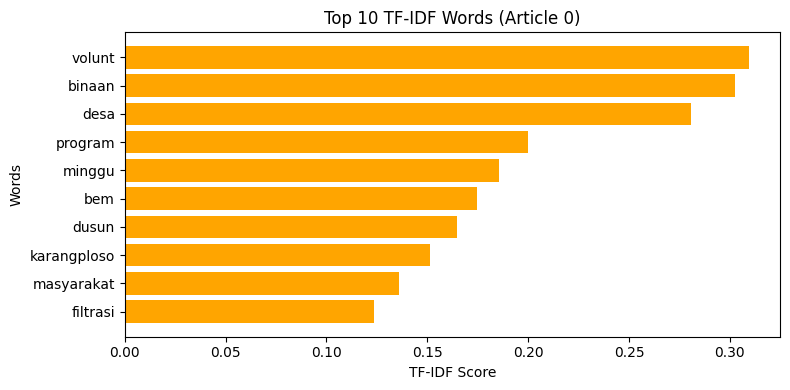


Article 1:
  topik: 0.3145
  gili: 0.2352
  segta: 0.2097
  to: 0.1764
  iyang: 0.1764
  and: 0.1675
  green: 0.1573
  in: 0.1573
  qualiti: 0.1406
  sustain: 0.1406


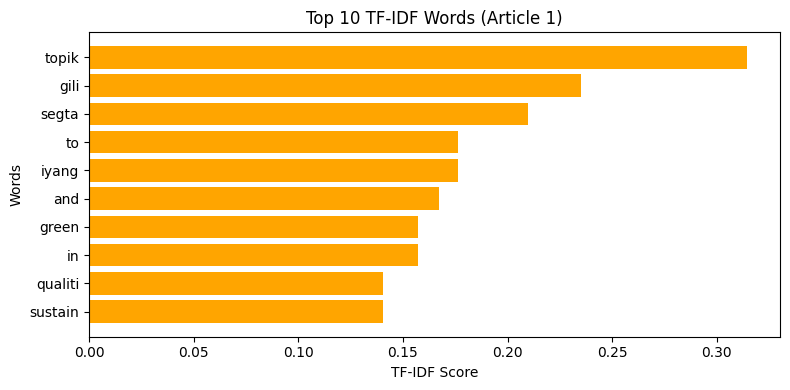


Article 2:
  harvest: 0.3102
  ime: 0.2766
  panen: 0.2440
  solar: 0.2342
  alat: 0.2318
  kepuh: 0.1551
  modern: 0.1551
  wangkal: 0.1551
  hasil: 0.1550
  tim: 0.1488


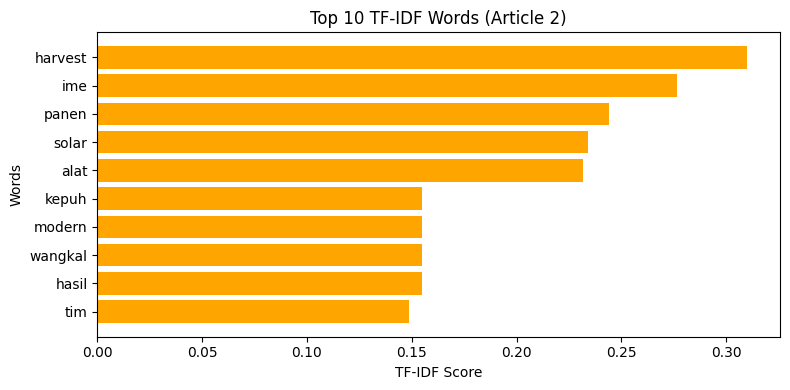


Article 3:
  pupuk: 0.4213
  nanoshield: 0.2487
  agro: 0.2487
  petani: 0.2319
  sisik: 0.1865
  kimia: 0.1865
  kesuburan: 0.1865
  tanah: 0.1855
  poin: 0.1518
  dusun: 0.1392


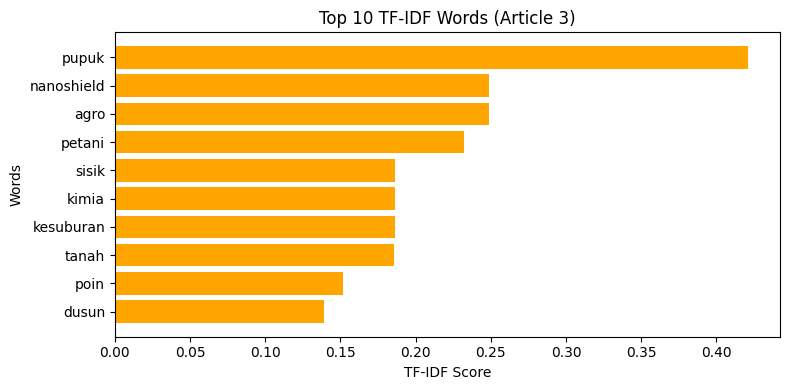


Article 4:
  tambak: 0.3720
  smartaqua: 0.3188
  alat: 0.2851
  rasena: 0.2428
  gunung: 0.2428
  anyar: 0.2250
  pakan: 0.2126
  pengguna: 0.1788
  memantau: 0.1457
  tim: 0.1430


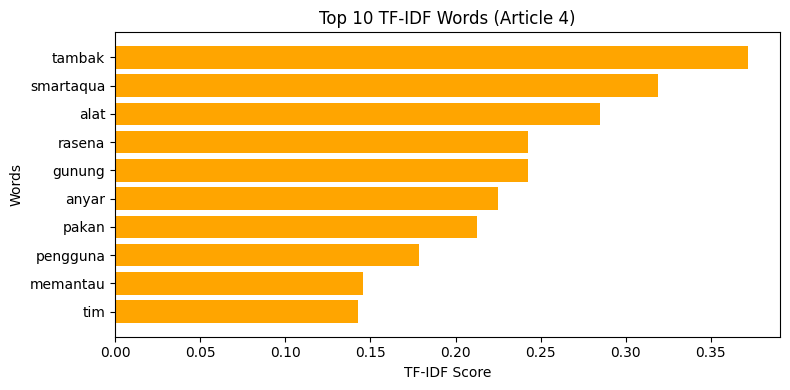


Article 5:
  sqym: 0.4164
  tanah: 0.2472
  lahan: 0.2456
  tani: 0.2323
  data: 0.2105
  petani: 0.1854
  imerci: 0.1754
  artifici: 0.1657
  algoritma: 0.1657
  network: 0.1657


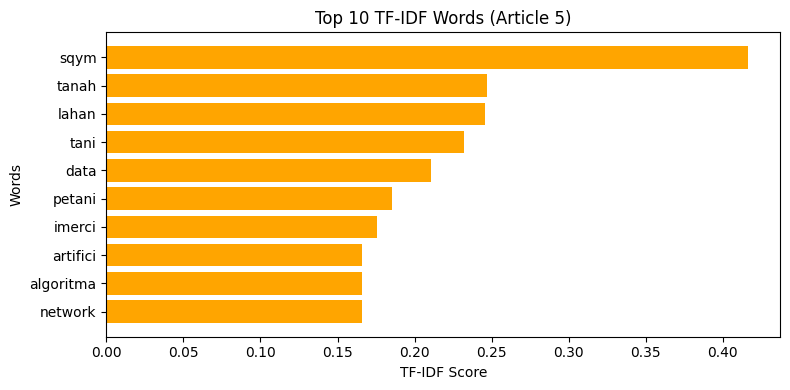


Article 6:
  petambak: 0.4195
  smartaqua: 0.3596
  energi: 0.3225
  alat: 0.2009
  pakan: 0.1798
  rasena: 0.1643
  mengoperasikan: 0.1344
  tim: 0.1290
  jadwal: 0.1199
  biaya: 0.1199


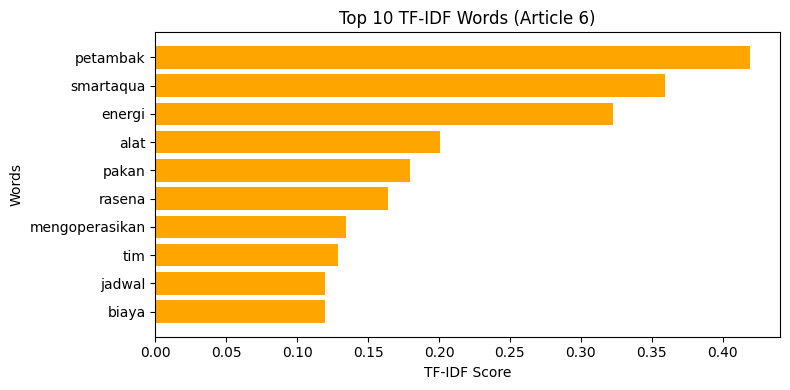


Article 7:
  hama: 0.3988
  desa: 0.2778
  plaosan: 0.2310
  petani: 0.2035
  pertanian: 0.1743
  pestisida: 0.1637
  program: 0.1412
  tenaga: 0.1386
  potensi: 0.1297
  suara: 0.1224


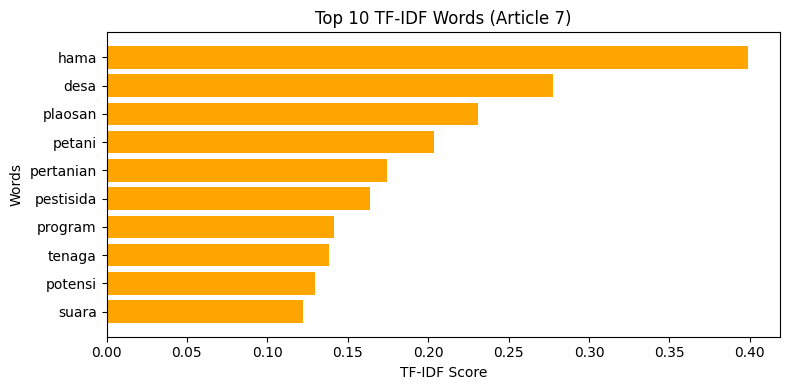


Article 8:
  agro: 0.3246
  nanoshield: 0.3246
  hama: 0.2966
  nanokitosan: 0.2373
  kimia: 0.1947
  pertanian: 0.1659
  pupuk: 0.1649
  berpotensi: 0.1456
  pestisida: 0.1298
  penggunaan: 0.1189


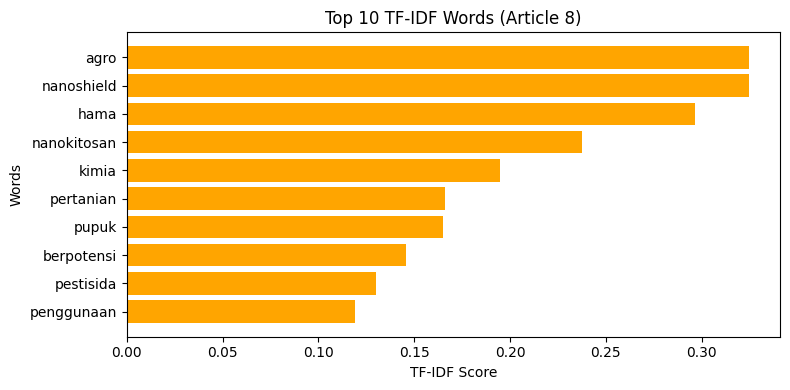


Article 9:
  bakat: 0.4411
  kampung: 0.4411
  nabdidaya: 0.2886
  budaya: 0.2473
  sampah: 0.2193
  lingkungan: 0.1902
  akuaponik: 0.1649
  bank: 0.1649
  masyarakat: 0.1425
  tari: 0.1237


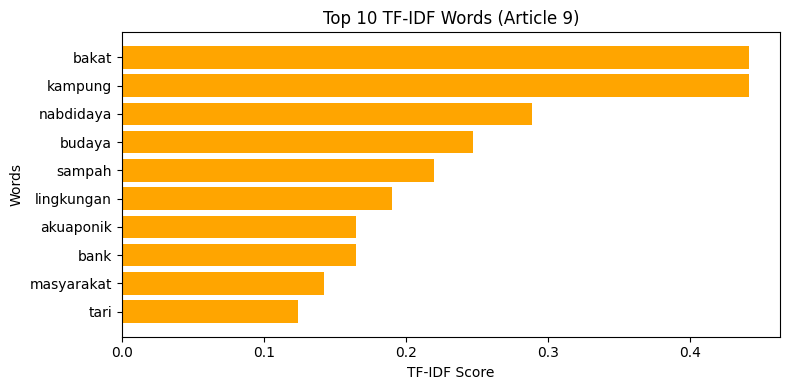


Article 10:
  imerci: 0.5626
  sqym: 0.2277
  cfp: 0.1863
  proyek: 0.1863
  versi: 0.1661
  pendanaan: 0.1518
  kompetisi: 0.1397
  aismo: 0.1397
  hutan: 0.1397
  sdg: 0.1361


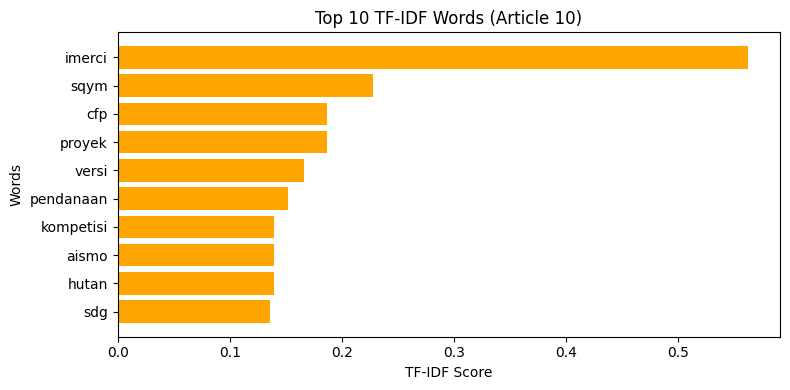


Article 11:
  limbah: 0.3731
  biochar: 0.3570
  siwalan: 0.2550
  kulit: 0.2550
  pengelolaan: 0.2310
  respons: 0.1819
  product: 0.1819
  consumpt: 0.1819
  ekonomi: 0.1605
  keberlanjutan: 0.1441


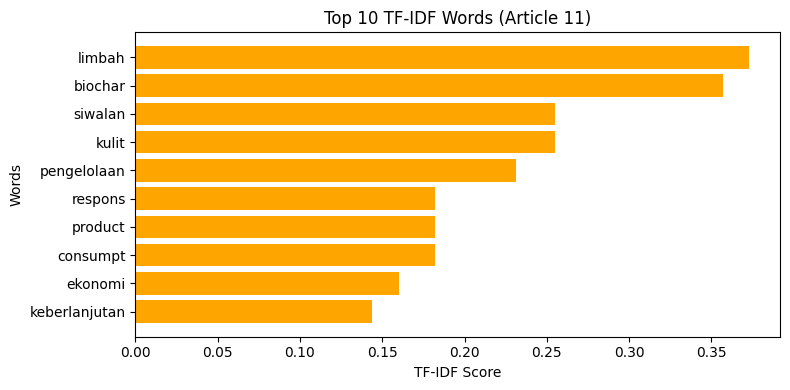


Article 12:
  imerci: 0.4905
  sqym: 0.2940
  video: 0.2887
  short: 0.2165
  movi: 0.2165
  festiv: 0.1931
  juara: 0.1444
  booth: 0.1444
  memamerkan: 0.1444
  lolo: 0.1444


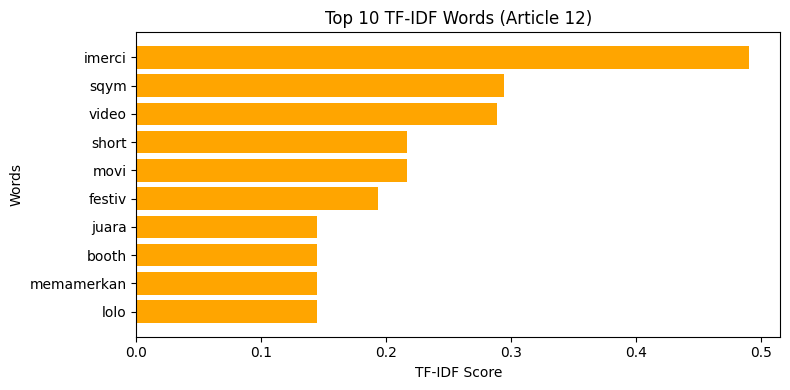


Article 13:
  evc: 0.3220
  pengisian: 0.3220
  bangga: 0.2871
  rc: 0.2147
  nree: 0.2147
  smk: 0.2147
  wijaya: 0.2147
  kendaraan: 0.2147
  daya: 0.1835
  putra: 0.1621


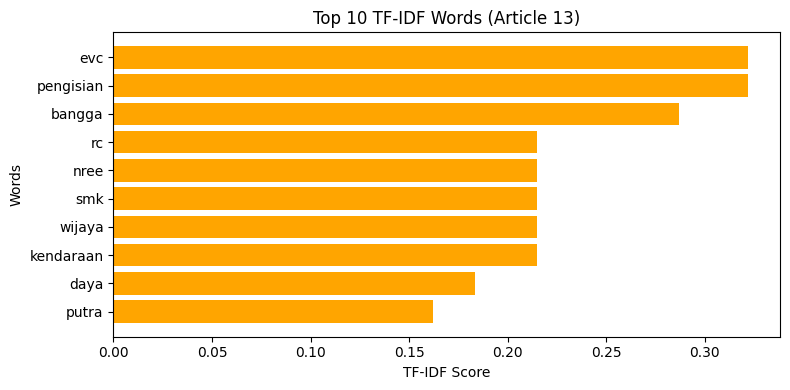


Article 14:
  workshop: 0.3446
  web: 0.2757
  pengaturan: 0.2068
  keterbacaan: 0.2068
  artikel: 0.2068
  brand: 0.1843
  websit: 0.1843
  materi: 0.1735
  sesuai: 0.1684
  pengunjung: 0.1684


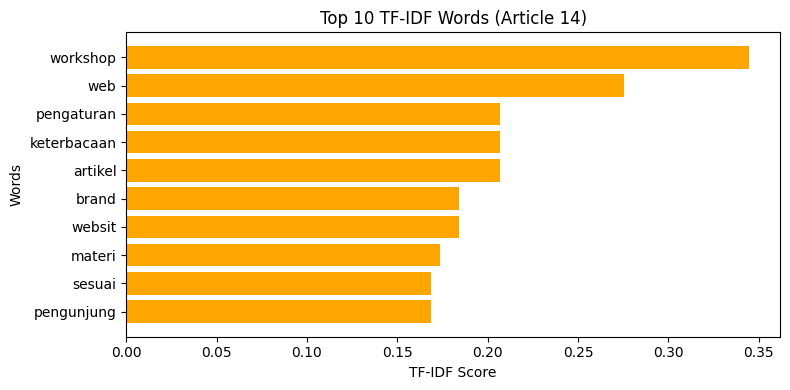


Article 15:
  nanosensor: 0.4937
  bbpom: 0.4320
  nanoteknolog: 0.3017
  surabaya: 0.2110
  rekayasa: 0.2011
  obat: 0.1851
  makanan: 0.1851
  prodi: 0.1476
  mendeteksi: 0.1100
  bahan: 0.1006


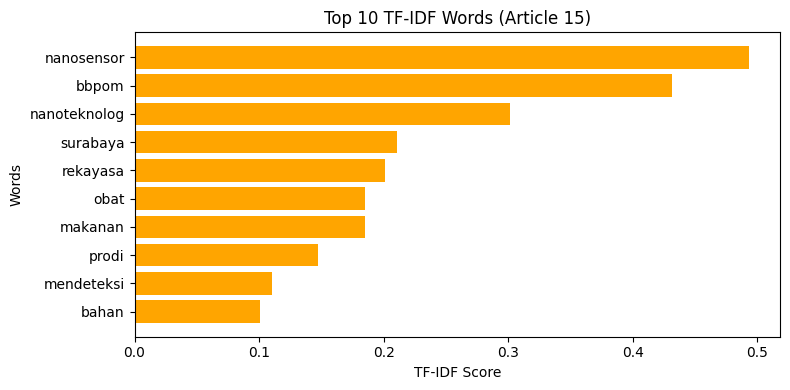


Article 16:
  lampu: 0.3177
  penerangan: 0.2723
  biru: 0.2545
  si: 0.2269
  telaga: 0.2036
  acdh: 0.1815
  ftmm: 0.1761
  aktivita: 0.1659
  unit: 0.1527
  tambang: 0.1527


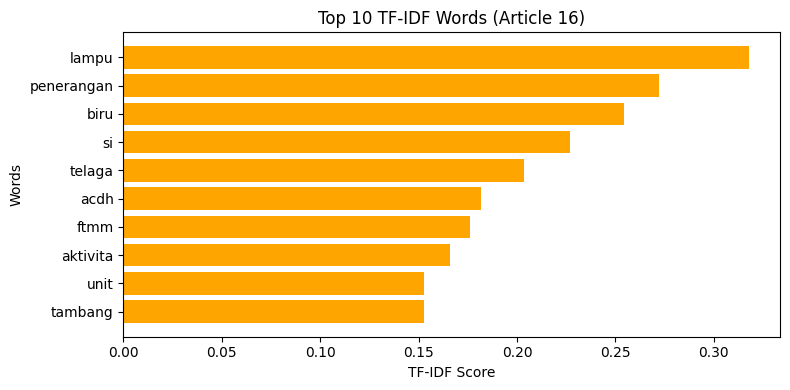


Article 17:
  hidroponik: 0.4674
  binaan: 0.2669
  nutrisi: 0.2621
  desa: 0.2163
  karangploso: 0.2135
  tanaman: 0.1979
  cair: 0.1966
  dusun: 0.1743
  nanokitosan: 0.1602
  pupuk: 0.1484


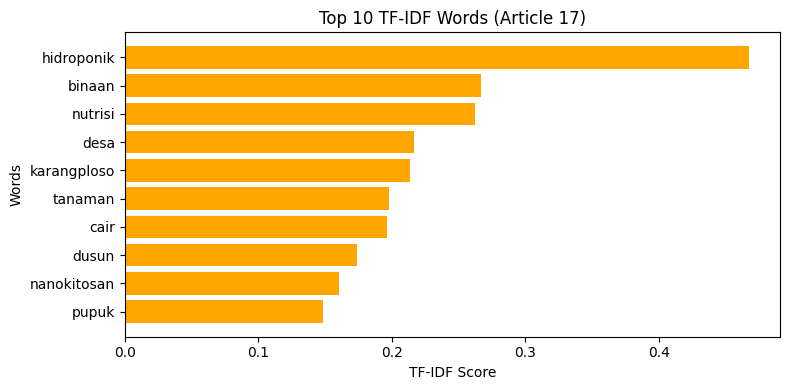


Article 18:
  ti: 0.4993
  mesin: 0.3328
  print: 0.2774
  pengma: 0.2416
  gunawan: 0.2219
  sma: 0.1664
  prodi: 0.1658
  teknik: 0.1580
  industri: 0.1264
  penyaringan: 0.1109


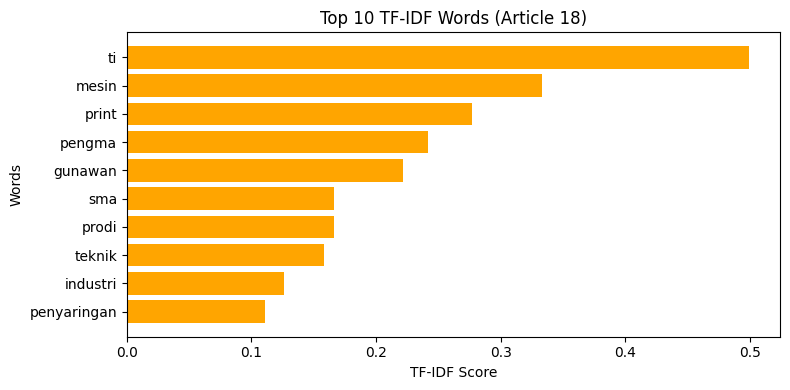


Article 19:
  listrik: 0.3138
  kontak: 0.2099
  energi: 0.2014
  kehidupan: 0.1872
  sambutan: 0.1483
  beras: 0.1396
  materi: 0.1321
  dosen: 0.1196
  fakulta: 0.1143
  penggunaan: 0.1143


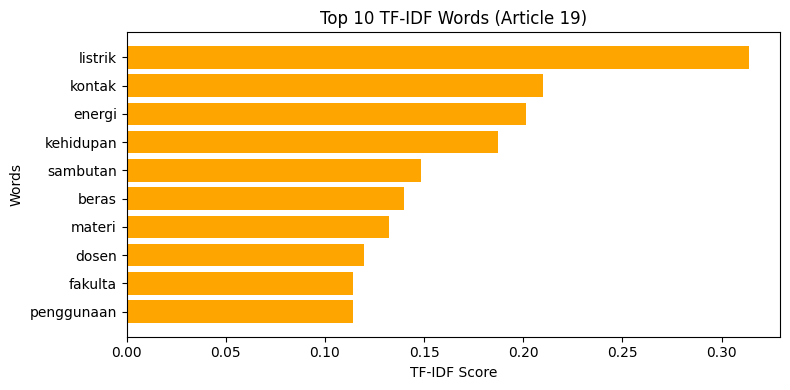


Article 20:
  pariwisata: 0.3815
  potensi: 0.2481
  elektro: 0.2481
  ngiroboyo: 0.2342
  pantai: 0.2210
  pokdarwi: 0.2088
  teknik: 0.2001
  kolaborasi: 0.1654
  unair: 0.1632
  mahasiswa: 0.1560


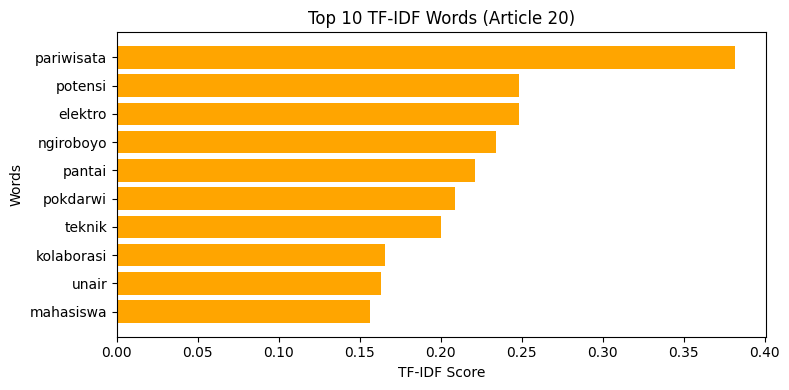


Article 21:
  pantai: 0.3189
  penduduk: 0.3138
  bumi: 0.2816
  lautan: 0.2816
  kebersihan: 0.2126
  kenjeran: 0.2112
  kegiatan: 0.1955
  lingkungan: 0.1624
  hidup: 0.1492
  nambangan: 0.1408


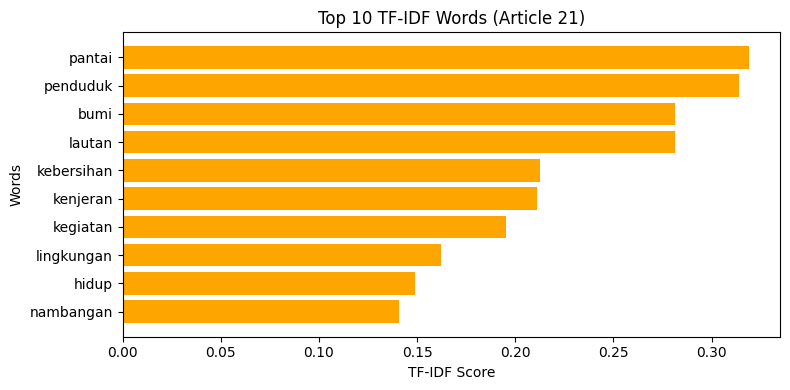


Article 22:
  zero: 0.3813
  pengolahan: 0.3399
  wast: 0.3050
  limbah: 0.3043
  aliyah: 0.2288
  gerakan: 0.2288
  masyarakat: 0.1918
  daerah: 0.1616
  pengabdian: 0.1536
  sutorejo: 0.1525


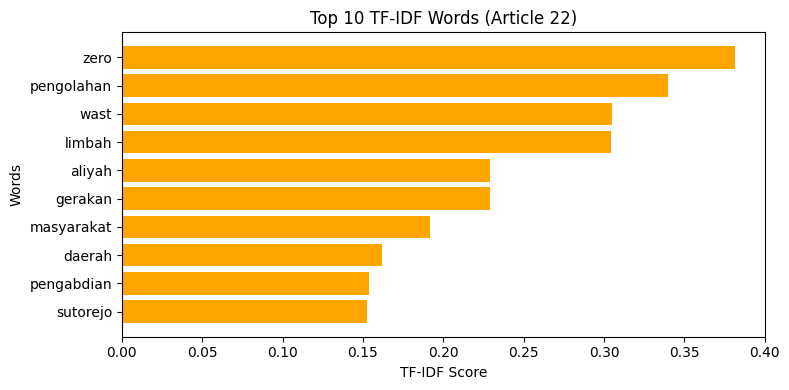


Article 23:
  pendidikan: 0.2791
  umkm: 0.2146
  educ: 0.1861
  salah: 0.1658
  masyarakat: 0.1656
  relevan: 0.1610
  berkualita: 0.1610
  qualiti: 0.1575
  individu: 0.1317
  kepetingan: 0.1317


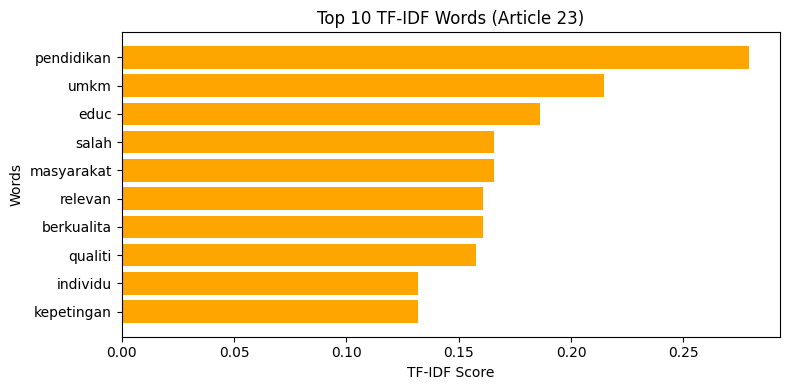


Article 24:
  anakanak: 0.3602
  efl: 0.3002
  merokok: 0.2401
  astra: 0.2401
  anak: 0.2401
  tpa: 0.2401
  kampung: 0.2141
  kegiatan: 0.1875
  pertemuan: 0.1606
  pemahaman: 0.1606


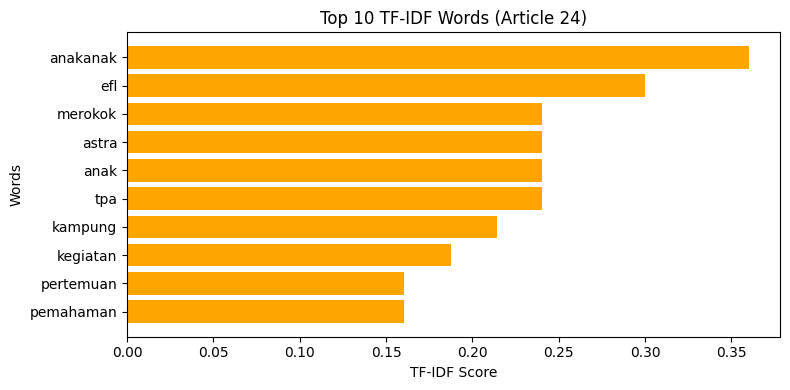


Article 25:
  sendang: 0.3509
  ngiriboyo: 0.2807
  fgd: 0.2503
  pacitan: 0.2287
  pantai: 0.2119
  wisata: 0.1983
  listrik: 0.1678
  makmur: 0.1403
  unsur: 0.1403
  tabung: 0.1403


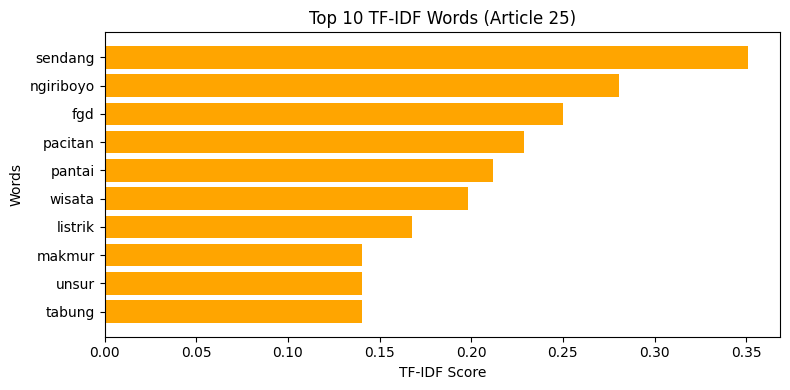


Article 26:
  pacitan: 0.4258
  ppdb: 0.2240
  support: 0.1825
  renew: 0.1691
  fakulta: 0.1625
  merdeka: 0.1493
  geoterm: 0.1493
  indrata: 0.1493
  pembinaan: 0.1493
  aji: 0.1493


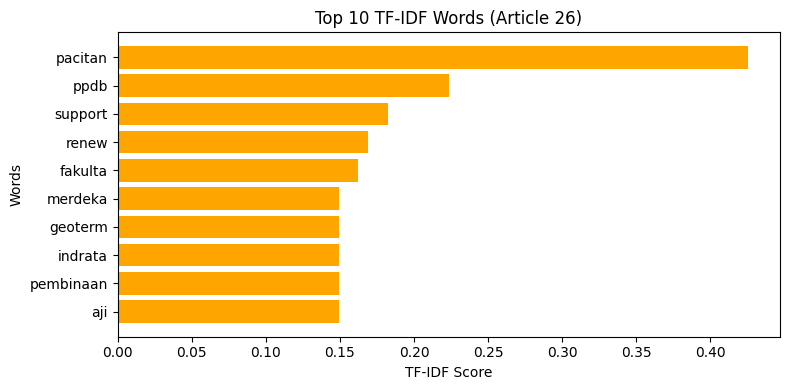


Article 27:
  bakau: 0.4242
  pohon: 0.3535
  fst: 0.2121
  energi: 0.1696
  peserta: 0.1691
  masyarakat: 0.1556
  acara: 0.1539
  kegiatan: 0.1473
  sel: 0.1414
  joint: 0.1414


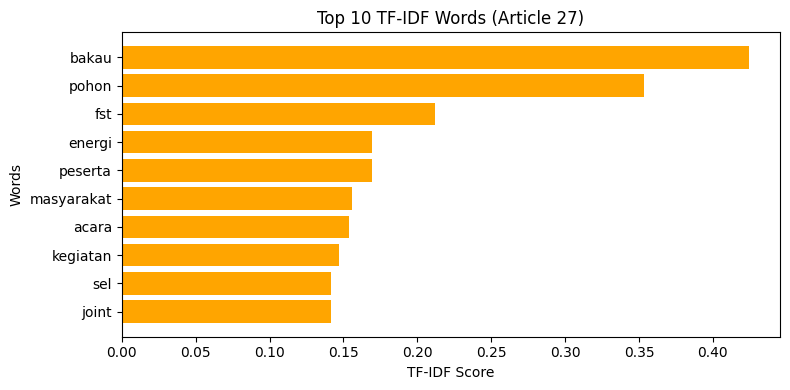


Article 28:
  pengudang: 0.2905
  si: 0.2072
  energi: 0.1951
  retna: 0.1932
  prof: 0.1932
  inac: 0.1743
  bintan: 0.1554
  pengeringan: 0.1554
  apsari: 0.1546
  ikan: 0.1546


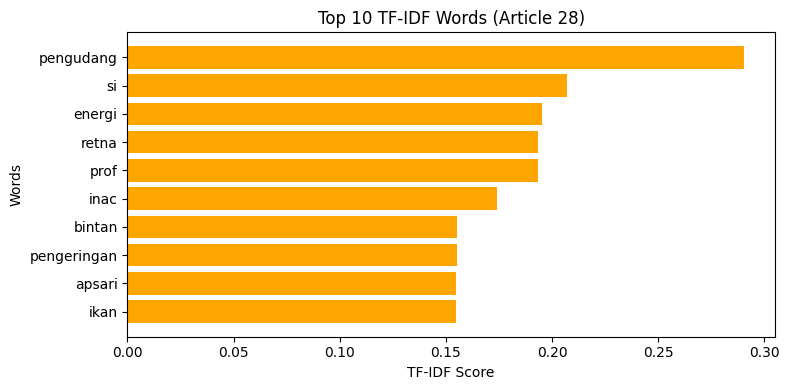


Article 29:
  bahru: 0.4598
  johor: 0.4598
  sijb: 0.1839
  malaysia: 0.1839
  indonesia: 0.1835
  sekolah: 0.1624
  unair: 0.1465
  kjri: 0.1379
  sd: 0.1379
  delegasi: 0.1379


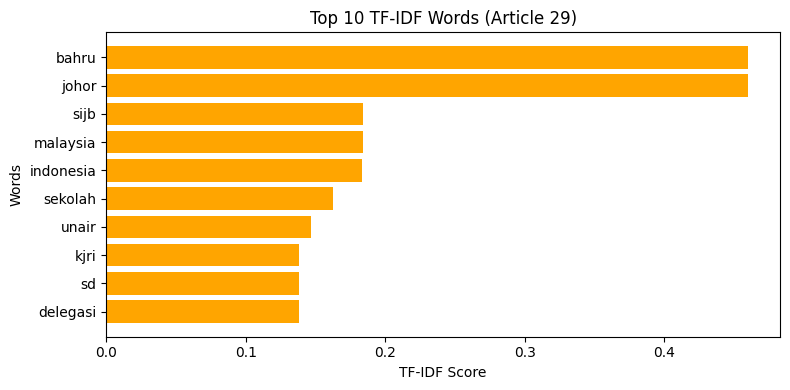

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature names (words) from the tfidf_vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame from the tfidf_matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df.index)

# For each row (article) in the TF-IDF DataFrame:
print("Top 10 TF-IDF words for each article:")
for index, row in tfidf_df.iterrows():
    # Sort the TF-IDF values in descending order and select top 10
    top_words = row.sort_values(ascending=False).head(10)

    # Print the article index and the top 10 words with their scores
    print(f"\nArticle {index}:")
    for word, score in top_words.items():
        print(f"  {word}: {score:.4f}")

    # Plot top 10 TF-IDF words
    plt.figure(figsize=(8, 4))
    plt.barh(top_words.index[::-1], top_words.values[::-1], color="orange")
    plt.title(f"Top 10 TF-IDF Words (Article {index})")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


## Pos tagging and ner

### Subtask:
Lakukan POS Tagging dan NER pada salah satu artikel.


In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 18.4 MB/s eta 0:00:00


In [ ]:
import stanza
stanza.download('id')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
nlp = stanza.Pipeline(lang='id', processors='tokenize, pos, lemma')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


In [ ]:
# Select the text from the first row of the 'cleaned_description' column
article_text = df['cleaned_description'].iloc[0]

# Process the text with the nlp pipeline
doc = nlp(article_text)

# Print the results for POS tagging and lemma
print("POS Tagging and Lemma for the first article:")
for sentence in doc.sentences:
    print("\nSentence:")
    for word in sentence.words:
        # Stanza's word object contains lemma and pos information
        print(f"Word: {word.text}\tLemma: {word.lemma}\tPOS: {word.pos}")

POS Tagging and Lemma for the first article:

Sentence:
Word: badan	Lemma: badan	POS: NOUN
Word: eksekutif	Lemma: eksekutif	POS: ADJ
Word: mahasiswa	Lemma: mahasiswa	POS: NOUN
Word: fakultas	Lemma: fakultas	POS: NOUN
Word: teknologi	Lemma: teknologi	POS: NOUN
Word: maju	Lemma: maju	POS: VERB
Word: dan	Lemma: dan	POS: CCONJ
Word: multidisiplin	Lemma: multidisiplin	POS: NOUN
Word: universitas	Lemma: universitas	POS: PROPN
Word: airlangga	Lemma: airlangga	POS: NOUN
Word: melaksanakan	Lemma: laksana	POS: VERB
Word: program	Lemma: program	POS: NOUN
Word: desa	Lemma: desa	POS: NOUN
Word: binaan	Lemma: bina	POS: NOUN
Word: sebagai	Lemma: sebagai	POS: ADP
Word: wujud	Lemma: wujud	POS: NOUN
Word: nyata	Lemma: nyata	POS: NOUN
Word: pengabdian	Lemma: abdi	POS: NOUN
Word: masyarakat	Lemma: masyarakat	POS: NOUN
Word: program	Lemma: program	POS: NOUN
Word: tahunan	Lemma: tahun	POS: NOUN
Word: bem	Lemma: bem	POS: NOUN
Word: ftmm	Lemma: ftmm	POS: NOUN
Word: ini	Lemma: ini	POS: DET
Word: berfokus	Lemma

In [ ]:
!pip install -q transformers datasets spacy torch

<h1>NER</H1>

In [ ]:
# Install libraries

# Download IndoBERT NER model dan tokenizer
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# Model IndoBERT untuk NER (fine-tuned)
model_checkpoint = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForTokenClassification.from_pretrained("cahya/bert-base-indonesian-NER")

# Buat pipeline NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Jalankan NER
entities = nlp_ner(article_text)

# Tampilkan hasil
for ent in entities:
    print(f"{ent['word']} ({ent['entity_group']}) : {ent['score']:.2f}")


Some weights of the model checkpoint at cahya/bert-base-indonesian-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


mahasiswa fakultas teknologi maju (PRD) : 0.39
##iplin universitas airlangga (PRD) : 0.51
program desa binaan (PRD) : 0.27
masyarakat program tahunan bem ft (ORG) : 0.36
ini (PRD) : 0.42
pada (ORG) : 0.26
pemberdayaan masyarakat desa dan tahun ini berkolaborasi dengan (PRD) : 0.45
argo (CRD) : 0.32
##n (PRD) : 0.21
kegiatan (ORG) : 0.32
ini (PRD) : 0.53
untuk (PER) : 0.43
melalui (ORG) : 0.30
pendekatan (PRD) : 0.35
teknologi (ORG) : 0.45
dan peningkatan kemandirian desa dengan (PRD) : 0.47
strategi tersebut desa (PRD) : 0.30
binaan (ORG) : 0.26
bagi (ORG) : 0.12
pengembangan (PRD) : 0.30
program (ORG) : 0.24
di (CRD) : 0.50
wilayah lain (QTY) : 0.25
pertama kegiatan (ORG) : 0.26
ini berlangsung pada hari jumat hingga (PRD) : 0.40
di (CRD) : 0.58
desa (QTY) : 0.32
##ong kabupaten pasuruan rombongan (PRD) : 0.36
menuju (CRD) : 0.26
lokasi (QTY) : 0.34
pada (PRD) : 0.33
internal untuk (PRD) : 0.31
pembukaan resmi berlangsung pada (PRD) : 0.41
di (CRD) : 0.75
dusun (DAT) : 0.24
gemp (CRD)

## Predict next words

### Subtask:
Prediksi 5 kata yang paling mungkin muncul setelah input satu kata tertentu menggunakan model N-gram.

In [ ]:
from collections import Counter
import itertools
import nltk

# Flatten the list of lists of tokens into a single list
all_tokens = list(itertools.chain.from_iterable(df['processed_description']))

# Generate bigrams (pairs of consecutive words)
bigrams = list(nltk.bigrams(all_tokens))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Generate trigrams (triplets of consecutive words)
trigrams = list(nltk.trigrams(all_tokens))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

print("Bigram counts generated.")
print("Trigram counts generated.")

Bigram counts generated.
Trigram counts generated.


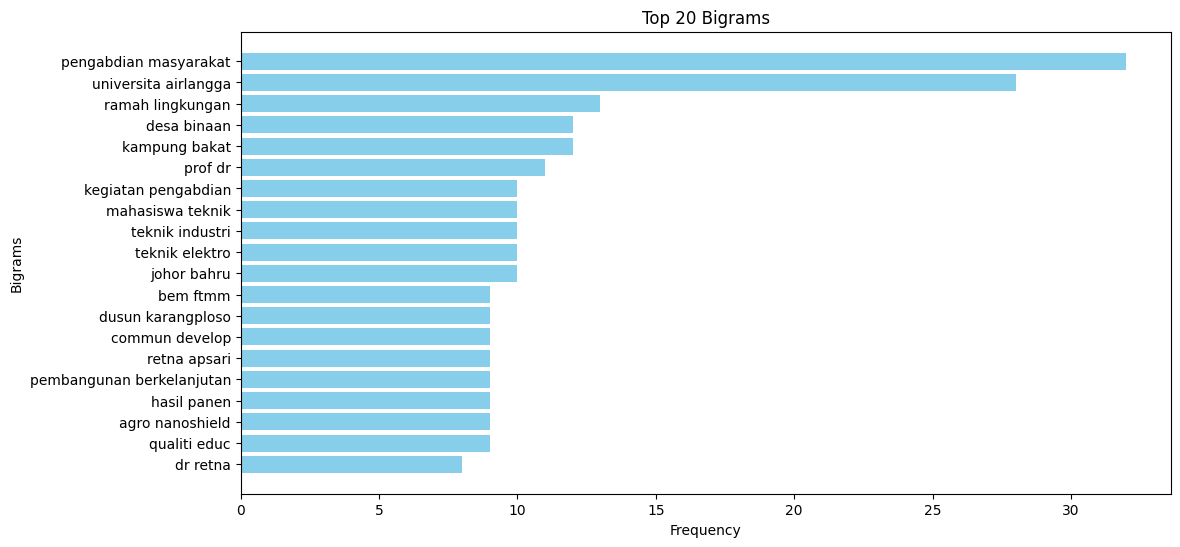

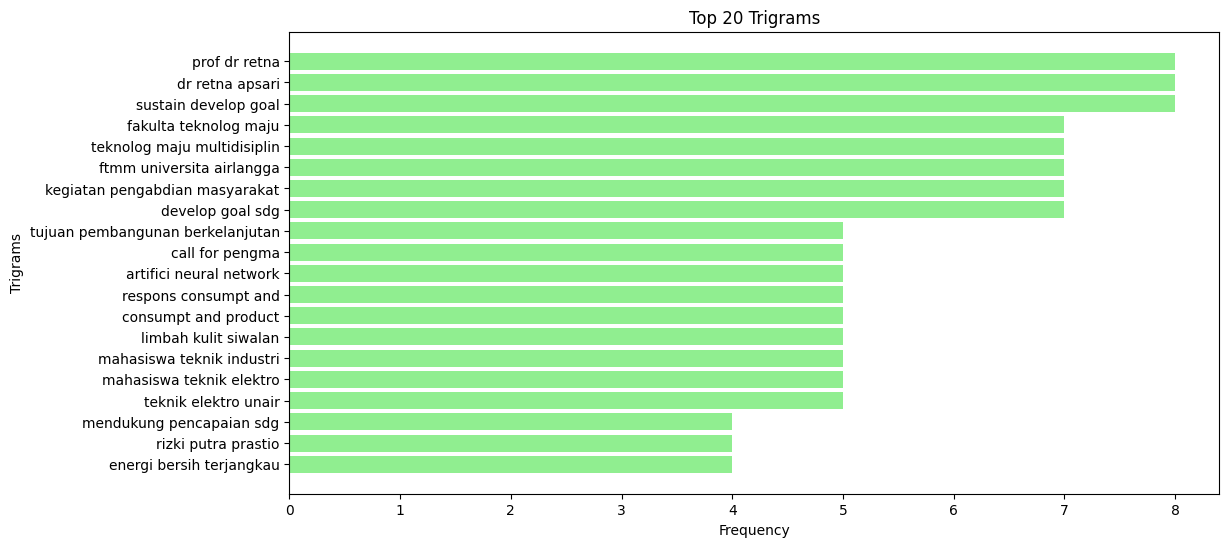

In [40]:
import matplotlib.pyplot as plt

# Tentukan jumlah bigram/trigram teratas yang ingin ditampilkan
top_n = 20

# Ambil bigram teratas
bigram_top = bigram_counts.most_common(top_n)
bigram_words = [' '.join(b) for b, _ in bigram_top]
bigram_freqs = [c for _, c in bigram_top]

# Ambil trigram teratas
trigram_top = trigram_counts.most_common(top_n)
trigram_words = [' '.join(t) for t, _ in trigram_top]
trigram_freqs = [c for _, c in trigram_top]

# Plot Bigram
plt.figure(figsize=(12, 6))
plt.barh(bigram_words[::-1], bigram_freqs[::-1], color="skyblue")
plt.title(f"Top {top_n} Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.show()

# Plot Trigram
plt.figure(figsize=(12, 6))
plt.barh(trigram_words[::-1], trigram_freqs[::-1], color="lightgreen")
plt.title(f"Top {top_n} Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.show()


In [ ]:
# Example usage: Predict the next 5 words after the word 'pengabdian' using bigram counts
input_word = 'pengabdian'
predicted_words_bigram = predict_next_words(input_word, bigram_counts)

print(f"Predicted next 5 words after '{input_word}' using bigram model:")
print(predicted_words_bigram)

# You can similarly use trigram_counts if you modify the predict_next_words function
# to handle trigrams or create a new function for trigram prediction.

Predicted next 5 words after 'pengabdian' using bigram model:
['masyarakat', 'hmti', 'desa', 'masyarakatpetani', 'inikondisi']


## Summary:

### Data Analysis Key Findings

* The dataset contains 30 articles with 'title' and 'description' fields.
* Text cleaning successfully removed HTML tags, URLs, numbers, and symbols, and converted text to lowercase.
* Text preprocessing involved tokenization, stopword removal (using Indonesian stopwords), and stemming (using Porter Stemmer), resulting in a processed list of tokens for each description.
* A TF-IDF matrix was generated, representing the articles as vectors. The matrix has a shape of (30, 1766), indicating 30 documents and 1766 unique words (features) after preprocessing.
* The top 10 TF-IDF words were successfully identified and displayed for each article, highlighting the most distinctive terms in each document.
* Attempts to perform POS tagging and NER using Stanza showed that while POS tagging and lemma extraction were successful, the NER model for Indonesian was not available, leading to an error.
* A bigram model was successfully built by flattening all processed tokens and counting the frequency of consecutive word pairs.
* The function `predict_next_words` was successfully implemented and demonstrated the ability to predict the most likely next words based on bigram frequencies for a given input word.

### Insights or Next Steps

* The limitation in performing NER highlights a potential area for further exploration: finding alternative Indonesian NLP libraries with robust NER capabilities or exploring the possibility of training a custom NER model.
* The bigram model provides a basic understanding of word sequences. For more advanced language modeling, building trigram or higher-order N-gram models, or utilizing deep learning models like LSTMs or Transformers, could be considered.
* The TF-IDF representation can be used for various downstream tasks such as document similarity analysis, clustering, or text classification.
* The insights gained from the top TF-IDF words can help understand the main themes and topics present in each article.